In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv(r"C:\Users\abhis\Desktop\SIH_internal\sih_rockfall_predictor_alert_system\ml_model\data\synthetic_rockfall_data.csv")


# Features and target
X = df[["displacement", "strain", "pore_pressure", "tilt", "vibration"]]
y = df["risk_class"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  # to save the trained model


In [7]:
# Initialize classifier
rf_model = RandomForestClassifier(
    n_estimators=100,       # number of trees
    random_state=42,
    max_depth=10,           # to prevent overfitting
)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [8]:
y_pred = rf_model.predict(X_test)


In [9]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9905

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1741
           1       0.90      0.99      0.94       149
           2       0.98      0.92      0.95       110

    accuracy                           0.99      2000
   macro avg       0.96      0.97      0.96      2000
weighted avg       0.99      0.99      0.99      2000


Confusion Matrix:
[[1733    8    0]
 [   0  147    2]
 [   0    9  101]]


In [14]:
import os
import joblib

# Path to save the model
model_path = r"sih_rockfall_predictor_alert_system\ml_model\models\rockfall_rf_model.pkl"

# Create the folder if it doesn't exist
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the model
joblib.dump(rf_model, model_path)
print("Model saved successfully!")


Model saved successfully!


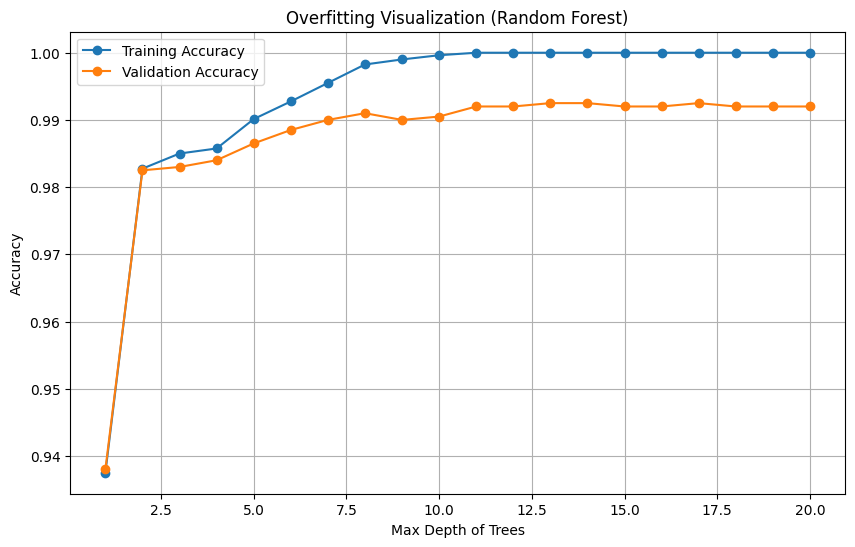

In [15]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Lists to store scores
train_scores = []
test_scores = []
depth_range = range(1, 21)  # Try different max_depth values

# Train multiple models with different max_depth
for depth in depth_range:
    rf = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=depth
    )
    rf.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, rf.predict(X_train))
    test_acc = accuracy_score(y_test, rf.predict(X_test))
    
    train_scores.append(train_acc)
    test_scores.append(test_acc)

# Plot training vs validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_scores, label="Training Accuracy", marker='o')
plt.plot(depth_range, test_scores, label="Validation Accuracy", marker='o')
plt.xlabel("Max Depth of Trees")
plt.ylabel("Accuracy")
plt.title("Overfitting Visualization (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()
